# Regresión logística

La regresión logística es una técnica de clasificación utilizada para predecir la probabilidad de que una observación pertenezca a una de dos clases posibles. A diferencia de la regresión lineal, donde el objetivo es predecir un valor continuo, la regresión logística se utiliza para predecir valores binarios (0 o 1, sí o no, verdadero o falso).

En el caso de la regresión logística con dos variables predictoras, la relación entre las variables independientes $x_1$ y $x_2$ y la probabilidad de la variable dependiente $y$ se modela mediante la siguiente función lineal:

$
h(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2
$

Donde:
- $h(x)$ es la combinación lineal de las variables $x_1$ y $x_2$.
- $\theta_0$ es el término independiente o intercepto.
- $\theta_1$ y $\theta_2$ son los coeficientes que representan las contribuciones de $x_1$ y $x_2$ respectivamente.

Dado que $h(x)$ es una función lineal, su salida puede tomar cualquier valor real, pero en la regresión logística, necesitamos que el resultado esté en el rango [0, 1] para representar una probabilidad. Por eso, se aplica la función sigmoide a $h(x)$, que convierte la salida en una probabilidad:

$
g(h(x)) = \frac{1}{1 + e^{-h(x)}}
$

Esta función sigmoide asegura que la salida sea siempre un valor entre 0 y 1, lo que permite interpretarla como una probabilidad. La función se simplifica de la siguiente forma:

$
g(z) = \frac{1}{1 + e^{-z}}
$

Donde $z$ se le conoce como score y representa la función lineal $h(x)$.

**Finalmente. La salida del modelo, es decir, la predicción $\hat{y}$, es la función de hipótesis:**

$
\hat{y} = g(z) = g(\theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2)
$


### Función de Costo en la Regresión Logística

La función de costo utilizada en la regresión logística es diferente de la usada en la regresión lineal. Para la regresión logística, se emplea la **función de costo de entropía cruzada** (o log loss), que mide la diferencia entre las probabilidades predichas y las etiquetas reales.

La función de costo se define como:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right]
$

Donde:
- $m$ es el número total de ejemplos en el conjunto de datos.
- $y^{(i)}$ es el valor real de la etiqueta para el $i$-ésimo ejemplo.
- $g(z^{(i)})$ que por simplicidad representa $g(h(x^{(i)}))$ es la probabilidad predicha por el modelo para el $i$-ésimo ejemplo.

El objetivo de la regresión logística es encontrar los valores óptimos de $\theta_0$, $\theta_1$ y $\theta_2$ que minimicen esta función de costo. Al hacerlo, el modelo ajusta sus predicciones para que las probabilidades calculadas se alineen lo más posible con las etiquetas reales, lo que mejora la precisión de la clasificación.


### Paso 1: Generar un Conjunto de Datos Sencillo

Primero, vamos a crear un conjunto de datos sintético en dos dimensiones.


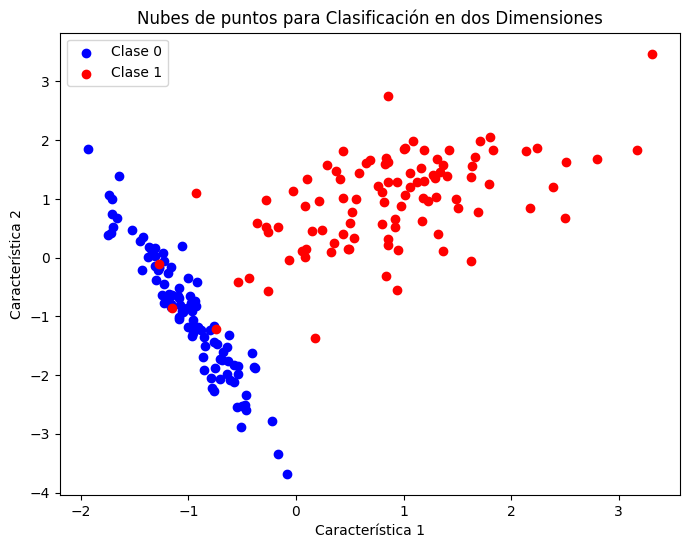

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar datos de clasificación
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=6)

# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Nubes de puntos para Clasificación en dos Dimensiones')
plt.legend()
plt.show()

### Paso 2: Inicializar los Parámetros

Inicializamos los parámetros $\theta_0$, $\theta_1$ y $\theta_2$ con valores iniciales.


In [3]:
import random
import numpy as np
# Inicializar parámetros de forma aleatoria
np.random.seed(0)
theta_0 = random.random()
theta_1 = random.random()
theta_2 = random.random()
# Definir la tasa de aprendizaje y el número de iteraciones
learning_rate = 0.1
n_iterations = 1000


print(f"Parámetros iniciales: \ntheta_0 = {theta_0}, \ntheta_1 = {theta_1}, \ntheta_2 = {theta_2}")

Parámetros iniciales: 
theta_0 = 0.9738868837641917, 
theta_1 = 0.6423108598940368, 
theta_2 = 0.03196355612613522



### Paso 3: Implementar la Función Sigmoide y la Función de Costo

La función sigmoide es esencial para la regresión logística, ya que convierte la salida de la función lineal a una probabilidad entre 0 y 1.

$
g(z) = \frac{1}{1 + e^{-z}}
$

La función de costo para la regresión logística es la función de entropía cruzada:

$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right]
$


In [4]:
import math
def sigmoid(z):
    #su codigo va aqui:
    g = (1 / (1+ math.exp(-z)))
    return g

def hypothesis(X, theta_0, theta_1, theta_2):
    #su codigo va aqui
    g = theta_0 + theta_1*X + theta_2*X
    return g

def cost_function(X, y, theta_0, theta_1, theta_2):
    m = len(y)
    g = hypothesis(X, theta_0, theta_1, theta_2)
    #su codigo va aqui
    J = -(1/m) * np.sum(y*math.log(sigmoid(g))+(1-y)*math.log(1-sigmoid(g)))
    return J

## Visualizar datos con parámetros iniciales del modelo

In [5]:
# Generar una malla de puntos
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Calcular la frontera de decisión
Z = hypothesis(np.c_[xx1.ravel(), xx2.ravel()], theta_0, theta_1, theta_2)
Z = Z.reshape(xx1.shape)

# Visualizar la frontera de decisión y los datos
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de Decisión de la Regresión Logística')
plt.legend()
plt.show()

ValueError: cannot reshape array of size 20000 into shape (100,100)

###  Derivación del Gradiente

Para encontrar la actualización de los parámetros $ \theta_j $ (donde $ j = 0, 1, 2 $), necesitamos calcular la derivada parcial de la función de costo con respecto a cada $ \theta_j $.

$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{\partial}{\partial \theta_j} \left( -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(g(z^{(i)})) + (1 - y^{(i)}) \log(1 - g(z^{(i)})) \right] \right)
$

Consideremos primero la derivada de la función de costo respecto a $ \theta_j$. Para simplificar, derivamos para un solo ejemplo $ i $:

$
\frac{\partial J(\theta)}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \frac{\partial}{\partial \theta_j} \log(g(z^{(i)})) + (1 - y^{(i)}) \frac{\partial}{\partial \theta_j} \log(1 - g(z^{(i)})) \right]
$

La derivada de la función log-sigmoide es:

$
\frac{\partial \log(g(z^{(i)}))}{\partial \theta_j} = \frac{1}{g(z^{(i)})} \cdot \frac{\partial g(z^{(i)})}{\partial \theta_j}
$

La derivada de la función sigmoide \( g(z) \) respecto a \( z \) es:

$
\frac{\partial g(z)}{\partial z} = g(z) \cdot (1 - g(z))
$

Entonces:

$
\frac{\partial g(z^{(i)})}{\partial \theta_j} = g(z^{(i)}) \cdot (1 - g(z^{(i)})) \cdot x_j^{(i)}
$

Por lo tanto, la derivada de la función de costo con respecto a $ \theta_j $ es:

$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

### Fórmula de Actualización de Parámetros

Finalmente, en el algoritmo de gradiente descendente, los parámetros \( \theta_j \) se actualizan usando la siguiente fórmula:

$
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$

Sustituyendo la derivada obtenida:

$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

Donde $ \alpha $ es la tasa de aprendizaje.



### Paso 4: Implementar el Algoritmo de Gradiente Descendente

El gradiente descendente ajusta los parámetros $\theta_0$, $\theta_1$, y $\theta_2$ para minimizar la función de costo.

$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( g(z^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}
$

In [65]:
# Listas para almacenar el historial de costos y parámetros
cost_history = []
theta_0_history = []
theta_1_history = []
theta_2_history = []

# Algoritmo de gradiente descendente
for _ in range(n_iterations):
    # Calcular las predicciones
    
    
    # Calcular gradientes
    
    
    # Actualizar los parámetros
        
    # Almacenar el costo y los parámetros en cada iteración
    

# Mostrar los parámetros finales
print(f"Parámetros finales: theta_0 = {theta_0}, theta_1 = {theta_1}, theta_2 = {theta_2}")

Parámetros finales: theta_0 = 1.8446224431766516, theta_1 = 3.374753471454635, theta_2 = 1.6227043223020445


### Paso 5: Visualizar la Evolución de la Función de Costo

Visualizamos cómo la función de costo disminuye a lo largo de las iteraciones, lo que indica la convergencia del modelo.

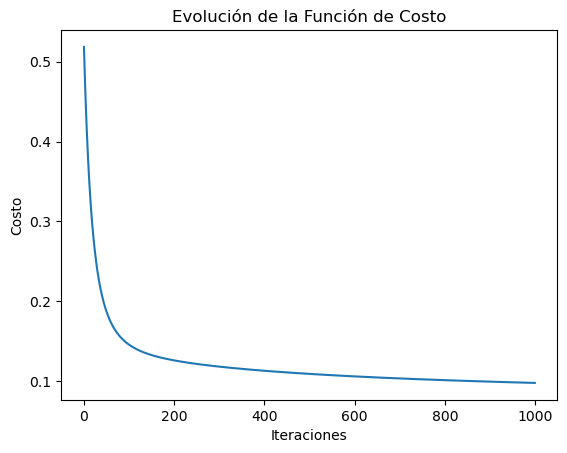

In [66]:
# Visualizar la evolución de la función de costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evolución de la Función de Costo')
plt.show()

### Paso 6: Visualizar la Frontera de Decisión

Finalmente, visualizamos la frontera de decisión generada por el modelo para separar las dos clases.


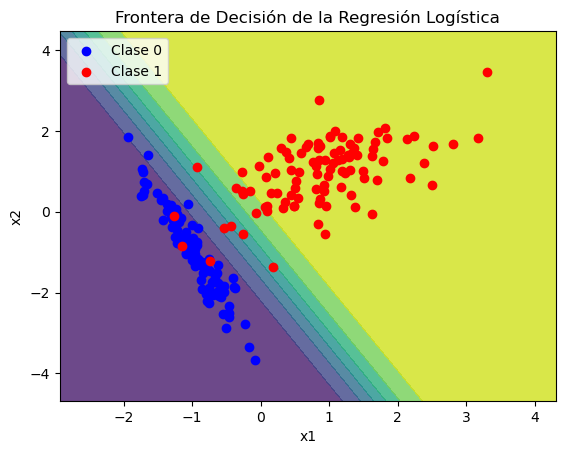

In [67]:
# Generar una malla de puntos
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))

# Calcular la frontera de decisión
Z = hypothesis(np.c_[xx1.ravel(), xx2.ravel()], theta_0, theta_1, theta_2)
Z = Z.reshape(xx1.shape)

# Visualizar la frontera de decisión y los datos
plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Clase 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de Decisión de la Regresión Logística')
plt.legend()
plt.show()